In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer
from sklearn import model_selection, tree, neighbors, metrics, ensemble
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df_train= pd.read_csv('LFTS_train/train.csv')

In [3]:
df_train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
df_train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

remove unwanted columns 

In [5]:
train=df_train.drop(['UniqueID','branch_id','supplier_id', 'manufacturer_id', 'Current_pincode_ID'],axis=1)

In [6]:
train.head()

,disbursed_amount,asset_cost,ltv,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,01-01-84,Salaried,03-08-18,6,1998,1,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,47145,65550,73.23,31-07-85,Self employed,26-09-18,6,1998,1,1,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,53278,61360,89.63,24-08-85,Self employed,01-08-18,6,1998,1,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,57513,66113,88.48,30-12-93,Self employed,26-10-18,6,1998,1,1,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,52378,60300,88.39,09-12-77,Self employed,26-09-18,6,1998,1,1,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 0 to 233153
Data columns (total 36 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                           233154 non-null int64
Driving_flag                           233154 non-null int64
Passport_flag                          233154 non-null int64
PERFORM_CNS.SCORE             

handle missing values

In [8]:
# if u just use dropna then u are loosing aroound 10k data points. So lets instead fill these up by first knowing how many values are null in each column
# train.dropna(inplace=True)
pd.isnull(train).sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS                         0
PRI.CURRENT.BALANCE                       0
PRI.SANCTIONED.AMOUNT                     0
PRI.DISBURSED.AMOUNT                      0
SEC.NO.OF.ACCTS                 

fill employment type data with max count of that column

In [9]:
train['Employment.Type'].fillna(train['Employment.Type'].dropna().max(), inplace=True)

In [10]:
pd.isnull(train['Employment.Type']).sum()

0

drop null values before converting

In [11]:
le=LabelEncoder()
col=['PERFORM_CNS.SCORE.DESCRIPTION', 'Employment.Type', 'Employee_code_ID']
for c in col:
    train[c]=le.fit_transform(train[c])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233154 entries, 0 to 233153
Data columns (total 36 columns):
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
Date.of.Birth                          233154 non-null object
Employment.Type                        233154 non-null int64
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                            233154 non-null int64
PAN_flag                               233154 non-null int64
VoterID_flag                           233154 non-null int64
Driving_flag                           233154 non-null int64
Passport_flag                          233154 non-null int64
PERFORM_CNS.SCORE              

handle date columns

In [13]:
train1= train.drop(['Date.of.Birth','DisbursalDate','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'], axis=1)

In [14]:
train1.head()

,disbursed_amount,asset_cost,ltv,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,0,6,1588,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,47145,65550,73.23,1,6,1588,1,1,0,0,...,0,0,0,0,1991,0,0,1,0,1
2,53278,61360,89.63,1,6,1588,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,57513,66113,88.48,1,6,1588,1,1,0,0,...,0,0,0,0,31,0,0,0,1,1
4,52378,60300,88.39,1,6,1588,1,1,0,0,...,0,0,0,0,0,0,0,0,1,1


In [15]:
loan_cor=train1.corr().abs()['loan_default'][:-1]

In [16]:
loan_cor

disbursed_amount                       0.077675
asset_cost                             0.014261
ltv                                    0.098208
Employment.Type                        0.028083
State_ID                               0.048075
Employee_code_ID                       0.020292
MobileNo_Avl_Flag                           NaN
Aadhar_flag                            0.041593
PAN_flag                               0.002046
VoterID_flag                           0.043747
Driving_flag                           0.005821
Passport_flag                          0.007602
PERFORM_CNS.SCORE                      0.057929
PERFORM_CNS.SCORE.DESCRIPTION          0.070217
PRI.NO.OF.ACCTS                        0.035456
PRI.ACTIVE.ACCTS                       0.041451
PRI.OVERDUE.ACCTS                      0.040872
PRI.CURRENT.BALANCE                    0.027386
PRI.SANCTIONED.AMOUNT                  0.011304
PRI.DISBURSED.AMOUNT                   0.011155
SEC.NO.OF.ACCTS                        0

In [17]:
col=loan_cor[loan_cor>.01].sort_values(ascending=False)

In [18]:
col

ltv                                    0.098208
disbursed_amount                       0.077675
PERFORM_CNS.SCORE.DESCRIPTION          0.070217
PERFORM_CNS.SCORE                      0.057929
State_ID                               0.048075
VoterID_flag                           0.043747
NO.OF_INQUIRIES                        0.043678
Aadhar_flag                            0.041593
PRI.ACTIVE.ACCTS                       0.041451
PRI.OVERDUE.ACCTS                      0.040872
PRI.NO.OF.ACCTS                        0.035456
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0.034462
NEW.ACCTS.IN.LAST.SIX.MONTHS           0.029400
Employment.Type                        0.028083
PRI.CURRENT.BALANCE                    0.027386
Employee_code_ID                       0.020292
asset_cost                             0.014261
PRI.SANCTIONED.AMOUNT                  0.011304
PRI.DISBURSED.AMOUNT                   0.011155
PRIMARY.INSTAL.AMT                     0.010616
Name: loan_default, dtype: float64

these 20 are the most correlated columns to the loan_default

In [19]:
train2= train1[['ltv','disbursed_amount','PERFORM_CNS.SCORE.DESCRIPTION','PERFORM_CNS.SCORE','State_ID','VoterID_flag',
              'NO.OF_INQUIRIES','Aadhar_flag','PRI.ACTIVE.ACCTS','PRI.OVERDUE.ACCTS','PRI.NO.OF.ACCTS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
              'NEW.ACCTS.IN.LAST.SIX.MONTHS','Employment.Type','PRI.CURRENT.BALANCE','Employee_code_ID','asset_cost','PRI.SANCTIONED.AMOUNT',
              'PRI.DISBURSED.AMOUNT','PRIMARY.INSTAL.AMT','loan_default']]

In [20]:
train2.head()

,ltv,disbursed_amount,PERFORM_CNS.SCORE.DESCRIPTION,PERFORM_CNS.SCORE,State_ID,VoterID_flag,NO.OF_INQUIRIES,Aadhar_flag,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,...,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NEW.ACCTS.IN.LAST.SIX.MONTHS,Employment.Type,PRI.CURRENT.BALANCE,Employee_code_ID,asset_cost,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,loan_default
0,89.55,50578,13,0,6,0,0,1,0,0,...,0,0,0,0,1588,58400,0,0,0,0
1,73.23,47145,8,598,6,0,0,1,1,1,...,1,0,1,27600,1588,65550,50200,50200,1991,1
2,89.63,53278,13,0,6,0,0,1,0,0,...,0,0,1,0,1588,61360,0,0,0,0
3,88.48,57513,11,305,6,0,1,1,0,0,...,0,0,1,0,1588,66113,0,0,31,1
4,88.39,52378,13,0,6,0,1,1,0,0,...,0,0,1,0,1588,60300,0,0,0,1


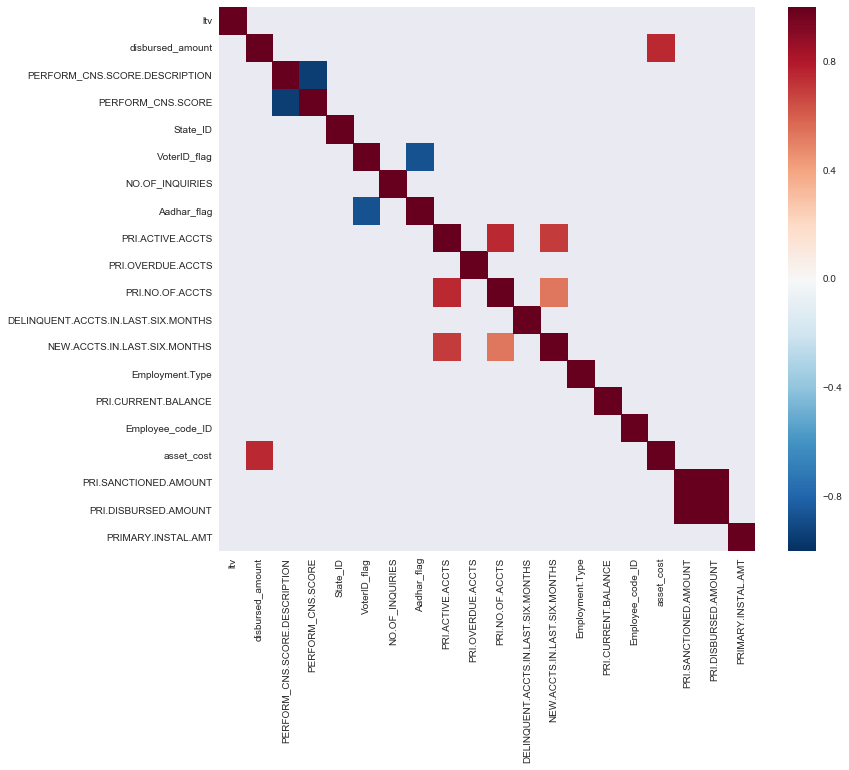

In [21]:
corr=train2.drop('loan_default',axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[abs(corr)>0.5])
plt.show()

lets drop the correlated features like PERFORM_CNS.SCORE.DESCRIPTION, adhar flag

In [22]:
train3=train2.drop(['PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS','Aadhar_flag','NEW.ACCTS.IN.LAST.SIX.MONTHS','asset_cost','PRI.DISBURSED.AMOUNT'], axis=1)

In [23]:
train3.head()

,ltv,disbursed_amount,PERFORM_CNS.SCORE.DESCRIPTION,State_ID,VoterID_flag,NO.OF_INQUIRIES,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Employment.Type,PRI.CURRENT.BALANCE,Employee_code_ID,PRI.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT,loan_default
0,89.55,50578,13,6,0,0,0,0,0,0,0,1588,0,0,0
1,73.23,47145,8,6,0,0,1,1,1,1,27600,1588,50200,1991,1
2,89.63,53278,13,6,0,0,0,0,0,1,0,1588,0,0,0
3,88.48,57513,11,6,0,1,0,0,0,1,0,1588,0,31,1
4,88.39,52378,13,6,0,1,0,0,0,1,0,1588,0,0,1


In [24]:
train3.shape

(233154, 15)

from an initial of 41 columns we have dropped to 15 columns

In [25]:
train3.head()

,ltv,disbursed_amount,PERFORM_CNS.SCORE.DESCRIPTION,State_ID,VoterID_flag,NO.OF_INQUIRIES,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,Employment.Type,PRI.CURRENT.BALANCE,Employee_code_ID,PRI.SANCTIONED.AMOUNT,PRIMARY.INSTAL.AMT,loan_default
0,89.55,50578,13,6,0,0,0,0,0,0,0,1588,0,0,0
1,73.23,47145,8,6,0,0,1,1,1,1,27600,1588,50200,1991,1
2,89.63,53278,13,6,0,0,0,0,0,1,0,1588,0,0,0
3,88.48,57513,11,6,0,1,0,0,0,1,0,1588,0,31,1
4,88.39,52378,13,6,0,1,0,0,0,1,0,1588,0,0,1


In [26]:
# apply scaler to the data
y=train3['loan_default']
x=train3.drop('loan_default',1)

In [27]:
norm=Normalizer()
x_norm=pd.DataFrame(norm.fit_transform(x))

In [28]:
x_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.001770,0.999506,0.000257,0.000119,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031382,0.000000,0.000000
1,0.000986,0.635072,0.000108,0.000081,0,0.000000,0.000013,0.000013,0.000013,0.000013,0.371789,0.021391,0.676224,0.026820
2,0.001682,0.999555,0.000244,0.000113,0,0.000000,0.000000,0.000000,0.000000,0.000019,0.000000,0.029793,0.000000,0.000000
3,0.001538,0.999618,0.000191,0.000104,0,0.000017,0.000000,0.000000,0.000000,0.000017,0.000000,0.027601,0.000000,0.000539
4,0.001687,0.999539,0.000248,0.000114,0,0.000019,0.000000,0.000000,0.000000,0.000019,0.000000,0.030304,0.000000,0.000000


In [29]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scale=pd.DataFrame(scaler.fit_transform(x))

/Users/gagicha/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
x_scale.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.935860,0.038125,0.684211,0.238095,0,0.000000,0.000000,0.00,0.00,0,0.064710,0.485775,0.00000,0.000000
1,0.743792,0.034612,0.421053,0.238095,0,0.000000,0.006944,0.04,0.05,1,0.064978,0.485775,0.00005,0.000078
2,0.936801,0.040888,0.684211,0.238095,0,0.000000,0.000000,0.00,0.00,1,0.064710,0.485775,0.00000,0.000000
3,0.923267,0.045222,0.578947,0.238095,0,0.027778,0.000000,0.00,0.00,1,0.064710,0.485775,0.00000,0.000001
4,0.922208,0.039967,0.684211,0.238095,0,0.027778,0.000000,0.00,0.00,1,0.064710,0.485775,0.00000,0.000000


In [31]:
train_x, test_x, train_y, test_y= model_selection.train_test_split(x_norm, y, test_size=0.33)

In [32]:
test_y.value_counts()

0    60129
1    16812
Name: loan_default, dtype: int64

In [33]:
rf=ensemble.RandomForestClassifier()
rf.fit(train_x, train_y)
print('acc: ',rf.score(test_x, test_y))
pred_rf=rf.predict(test_x)
print('auc: ',metrics.roc_auc_score(test_y, pred_rf))
print(metrics.confusion_matrix(test_y, pred_rf))

/Users/gagicha/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


acc:  0.7589321688046685
auc:  0.5159453125102942
[[56975  3154]
 [15394  1418]]


trying random search hyper parameter tuning with cross validation. Cross validation is used when u have to find the optimal parameters, so we train on training set and a part of training set kept aside befoore is ised to test the performance of the model, calculate its score. and the model which gives the max cross validation score is chosen. then that best model is used for testing on the test data. 

n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)

In [44]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = ensemble.RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = model_selection.RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_x, train_y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   55.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=1, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [46]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [47]:
rf=rf_random.best_estimator_
print('acc: ',rf.score(test_x, test_y))
pred_rf=rf.predict(test_x)
print('auc: ',metrics.roc_auc_score(test_y, pred_rf))
print(metrics.confusion_matrix(test_y, pred_rf))

acc:  0.7804291600057187
auc:  0.5058528206112746
[[59742   387]
 [16507   305]]


use pca to reduce features, also apply resampling to remove class imbalance.